### Problem Statement : Investigate and analyze the factors influencing bike rental demand with the goal of developing a predictive model for the number of cycles rented.Using a dataset that includes features such as season, weather conditions, temperature, humidity, and day type (working day or holiday).The objective is to understand how these factors impact bike rentals using different hypothesis test.

In [1]:
!curl "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv" > bike_sharing.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  633k  100  633k    0     0  7026k      0 --:--:-- --:--:-- --:--:-- 7277k


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.gofplots import qqplot

In [3]:
df = pd.read_csv("bike_sharing.csv")

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.shape

(10886, 12)

In [6]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [7]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

##### There is no misssing data

In [8]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


##### 1. Temperature values range from 0.82 to 41.00, indicating a wide variation in temperature measurements.
##### 2. Feeling temperature values range from 0.76 to 45.45, indicating a wide variation in temperature measurements.
##### 3. Humidity values range from 0.00% (completely dry) to 100.00% (maximum humidity), covering the full spectrum of humidity levels.
##### 4. Windspeed values range from 0.00 (calm or no wind) to 56.9969, encompassing a wide range of wind speeds.

In [9]:
df.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16


# Univariate Analysis

In [10]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [11]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [12]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [13]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

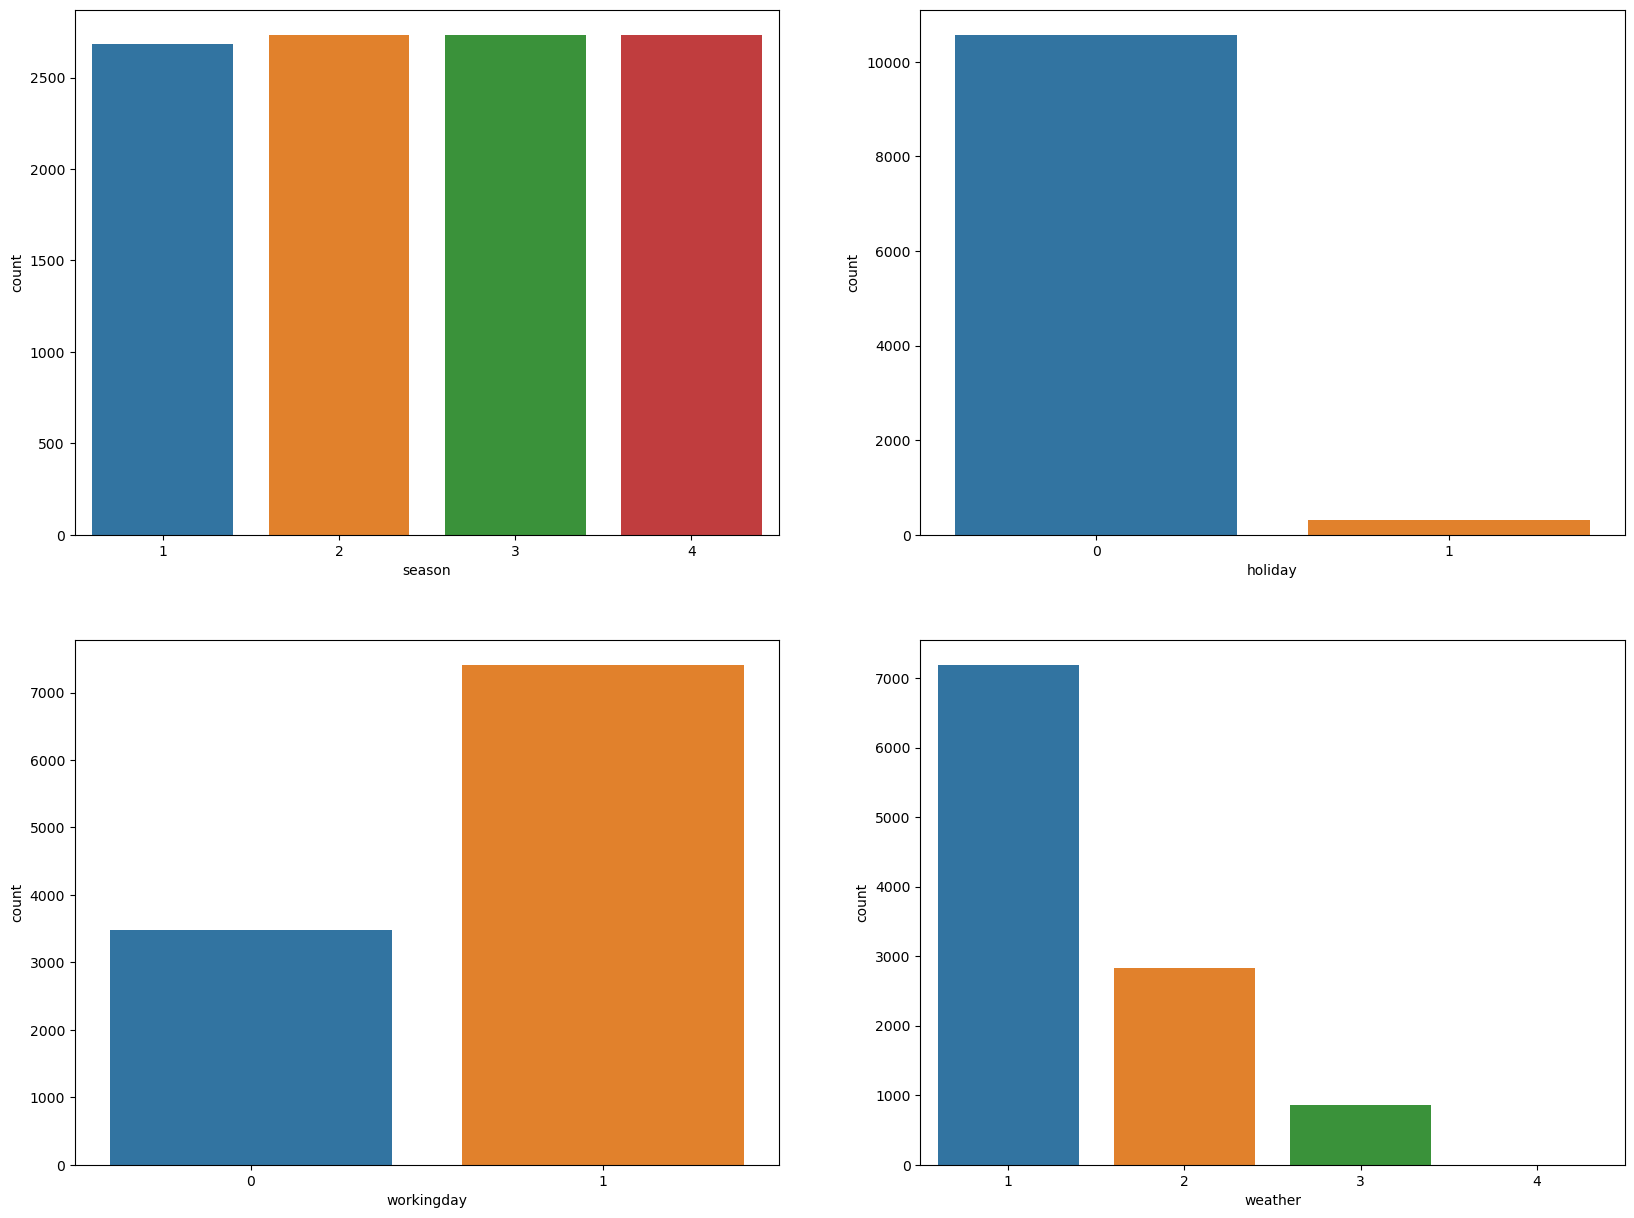

In [14]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.countplot(x='season',data=df)
plt.subplot(2,2,2)
sns.countplot(x='holiday',data=df)
plt.subplot(2,2,3)
sns.countplot(x='workingday',data=df)
plt.subplot(2,2,4)
sns.countplot(x='weather',data=df)
plt.show()

##### 1. The dataset appears to have a relatively balanced distribution of records across the four seasons.
##### 2. The dataset has an imbalanced distribution between non-holiday and holiday records.
##### 3. The dataset has a somewhat imbalanced distribution of records between working days and non-working days.
##### 4. Most Common Weather is of type 1 while rarest one is type 4,The distribution is imbalanced, with a significant difference in counts between the weather types

# Bivariate Analysis

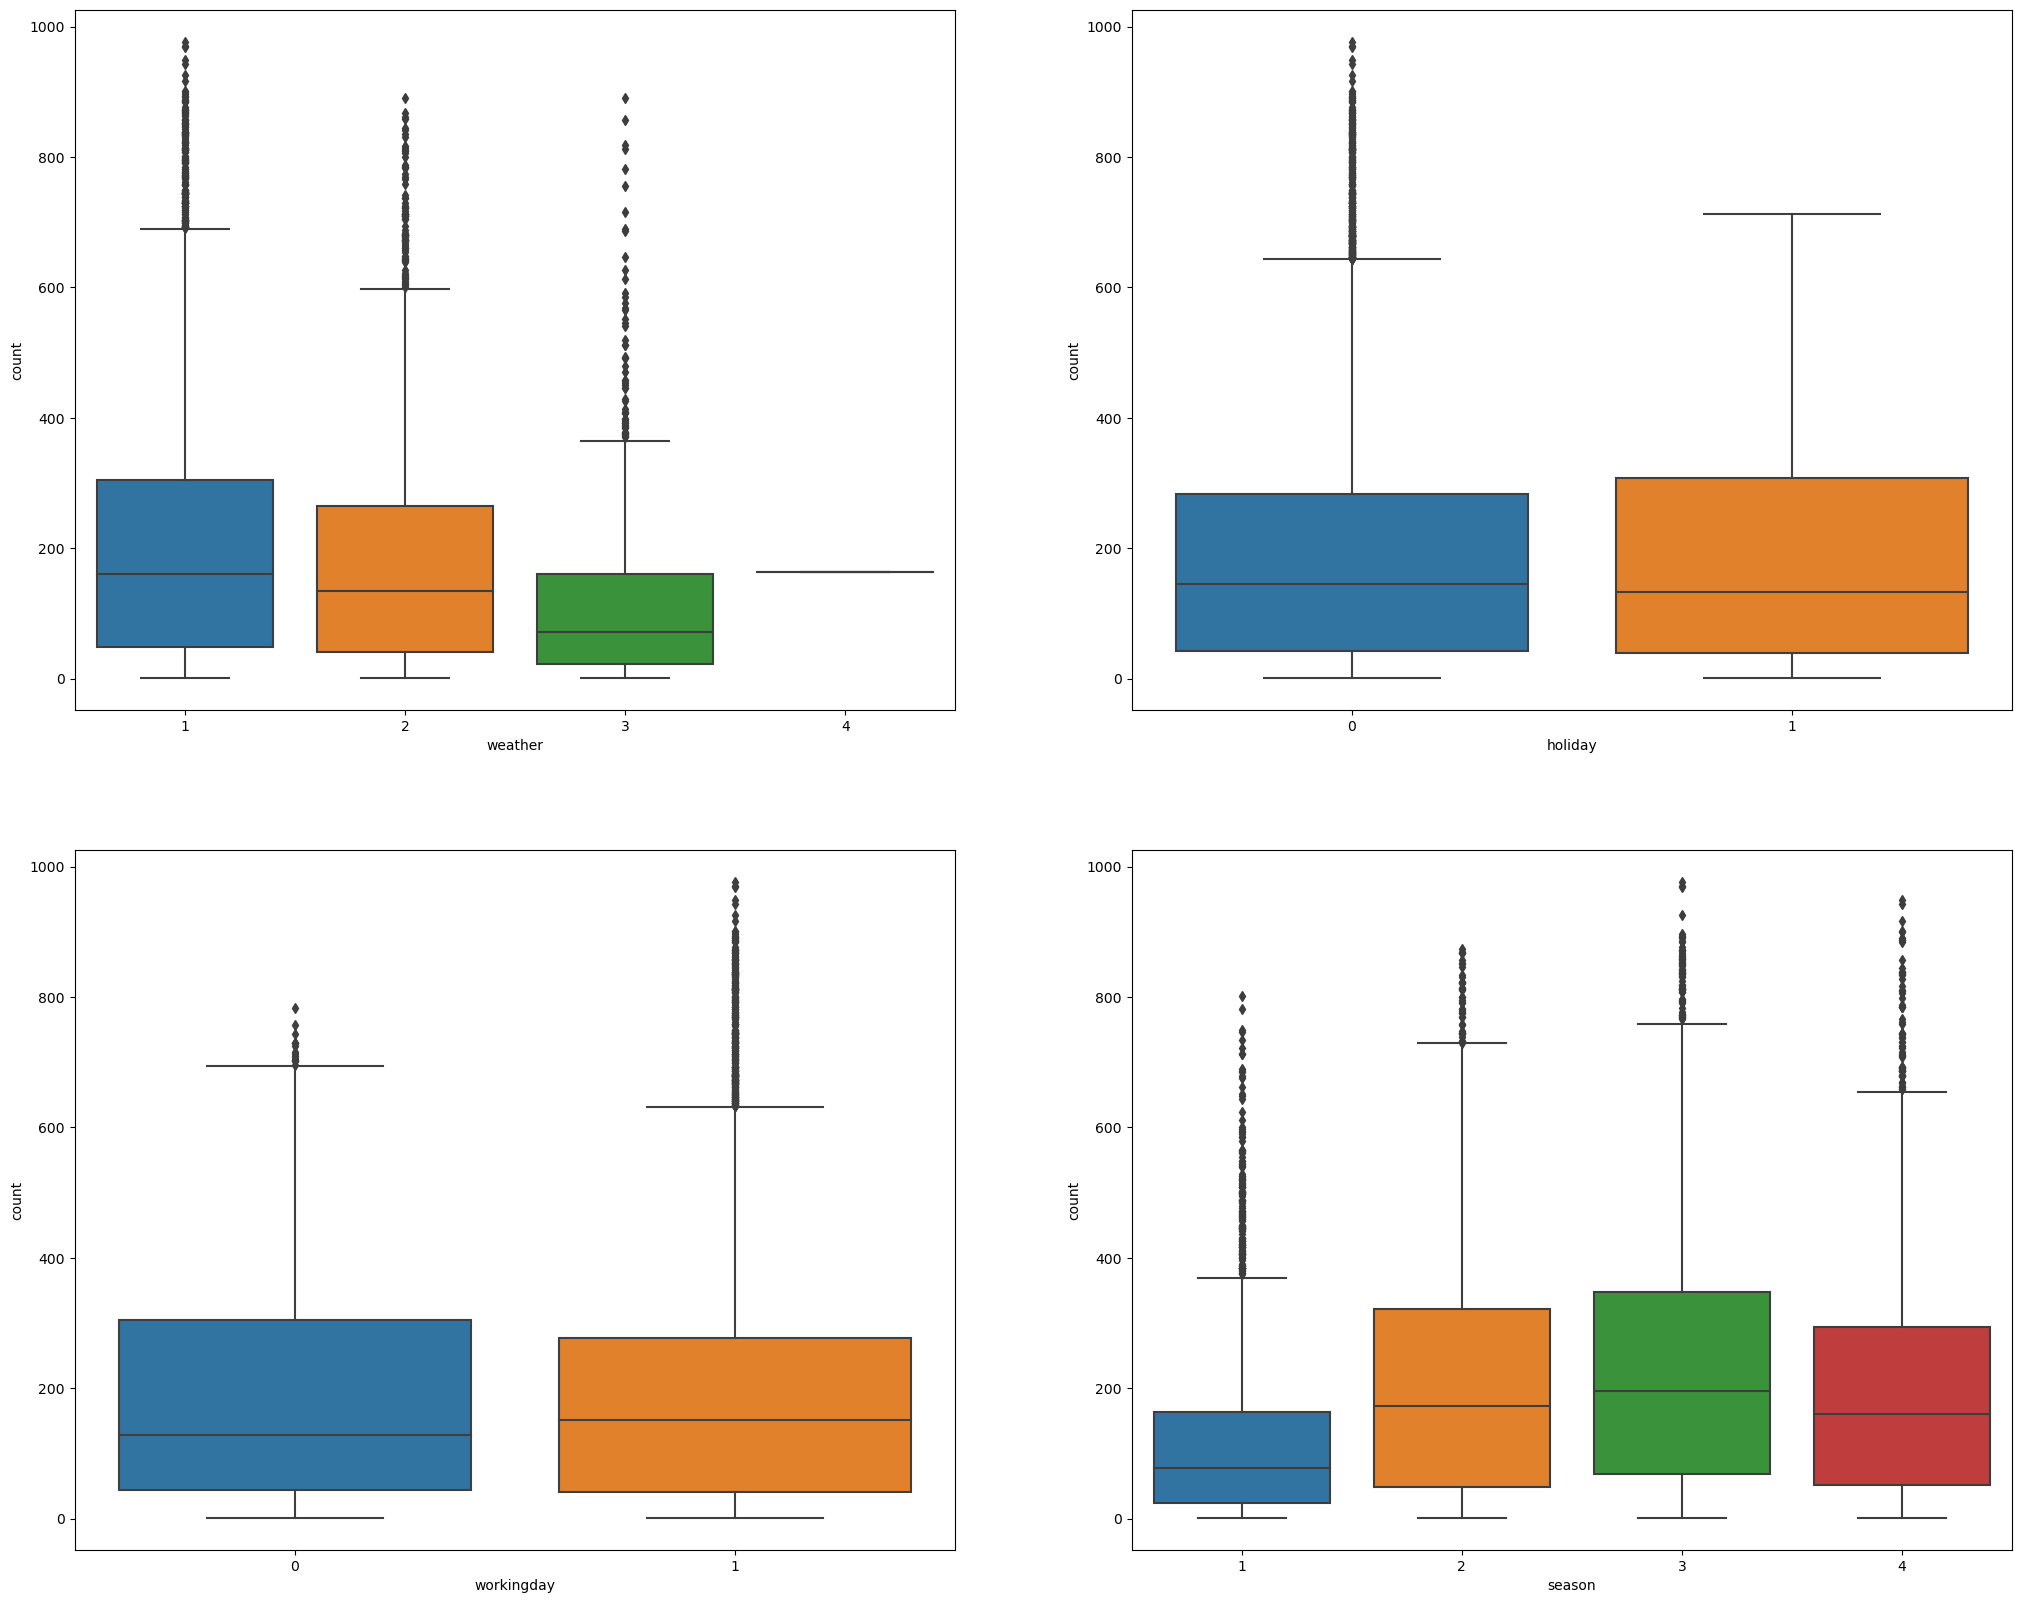

In [15]:
plt.figure(figsize=(25,20))
plt.subplot(2,2,1)
sns.boxplot(x='weather',y='count',data= df)
plt.subplot(2,2,2)
sns.boxplot(x='holiday',y='count',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='workingday',y='count',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='season',y='count',data=df)
plt.show()

##### 1. In each scenario, the presence of outliers indicates instances of exceptionally high or low rental counts that appear to be influenced by specific factors related to weather, holidays, working days, or seasons.
###### 2. Different weather conditions exhibit significant variations in both the mean and median bike rental counts, emphasizing the notable impact of weather on rental demand.
##### 3. Seasons exhibit considerable variations in both the average and median bike rental counts, emphasizing the distinct seasonal impact on rental demand.
##### 4. For 'workingday' and 'holiday' features, there is minimal difference between mean and median bike rental counts, indicating their limited impact on rental patterns.

# 1. Working Day Vs Count of cycles rented

In [16]:
from scipy.stats import ttest_ind
H0 = "Workingday and number of electric cycles rented are independant." #mu1 = mu2
H1 = "Workingday has effect on number of electric cycles rented." #mu1<mu2
workingday_1 = df.loc[df['workingday'] == 1]['count']
workingday_0 = df.loc[df['workingday'] == 0]['count']
np.mean(workingday_0),np.mean(workingday_1)

(188.50662061024755, 193.01187263896384)

In [17]:
t_stat,p_value = ttest_ind(workingday_1,workingday_0,alternative='less')
print("P-Value :",p_value)
alpha = 0.05
if p_value<alpha:
    print("Reject H0")
    print(H1)
else:
    print("Fail to reject H0")
    print(H0)

P-Value : 0.8867759788681933
Fail to reject H0
Workingday and number of electric cycles rented are independant.


##### Working day does not have a statistically significant effect on the number of electric cycles rented.

# 2. Holiday  Vs Count of cycles rented

In [18]:
from scipy.stats import ttest_ind
H0 = "Holiday and number of electric cycles rented are independant." #mu1 = mu2
H1 = "Hoiliday has effect on number of electric cycles rented." #mu1<mu2
holiday_1 = df.loc[df['holiday'] == 1]['count']
holiday_0 = df.loc[df['holiday'] == 0]['count']
np.mean(holiday_0),np.mean(holiday_1)

(191.7416548463357, 185.87781350482314)

In [19]:
t_stat,p_value = ttest_ind(holiday_0,holiday_1,alternative='greater')
print("P-Value :",p_value)
alpha = 0.05
if p_value<alpha:
    print("Reject H0")
    print(H1)
else:
    print("Fail to reject H0")
    print(H0)

P-Value : 0.28684619416355517
Fail to reject H0
Holiday and number of electric cycles rented are independant.


##### Holiday does not have a statistically significant effect on the number of electric cycles rented.

# 3. Season Vs Count of cycles rented

In [20]:
from scipy.stats import f_oneway,shapiro,levene
season_1 = df.loc[df['season'] == 1]['count']
season_2 = df.loc[df['season'] == 2]['count']
season_3 = df.loc[df['season'] == 3]['count']
season_4 = df.loc[df['season'] == 4]['count']
np.mean(season_1),np.mean(season_2),np.mean(season_3),np.mean(season_4)

(116.34326135517499, 215.25137211855105, 234.417124039517, 198.98829553767374)

#### To Verify -The distribution of the count of cycles rented for different seasons follows a Gaussian distribution.

In [21]:
len(season_1),len(season_2),len(season_3),len(season_4)

(2686, 2733, 2733, 2734)

In [22]:
alpha = 0.05
def check_guassian(num):
    H0 = f"The distribution of the count of cycles rented for season {num} follows a Gaussian distribution."
    Ha = f"The distribution of the count of cycles rented for season {num} does NOT follow a Gaussian distribution."
    if num == 1:
        p_value = shapiro(season_1)[1]
    elif num == 2:
        p_value = shapiro(season_2)[1]
    elif num == 3:
        p_value = shapiro(season_3)[1]
    else:
        p_value = shapiro(season_4)[1]
    print(f"Season {num} :")
    print("P-value:",p_value)
    if p_value<alpha:
        print("Reject H0.")
        print(Ha)
    else:
        print("Fail to Reject H0.")
        print(H0)       

In [23]:
check_guassian(1)

Season 1 :
P-value: 0.0
Reject H0.
The distribution of the count of cycles rented for season 1 does NOT follow a Gaussian distribution.


In [24]:
check_guassian(2)

Season 2 :
P-value: 6.039093315091269e-39
Reject H0.
The distribution of the count of cycles rented for season 2 does NOT follow a Gaussian distribution.


In [25]:
check_guassian(3)

Season 3 :
P-value: 1.043458045587339e-36
Reject H0.
The distribution of the count of cycles rented for season 3 does NOT follow a Gaussian distribution.


In [26]:
check_guassian(4)

Season 4 :
P-value: 1.1302396971766104e-39
Reject H0.
The distribution of the count of cycles rented for season 4 does NOT follow a Gaussian distribution.


##### ANOVA Assumption 1 - Not Satisfied : The data within each category does not exhibit a normal distribution.

### Assessing Data Distribution of count with Histogram and Q-Q Plot for different Seasons

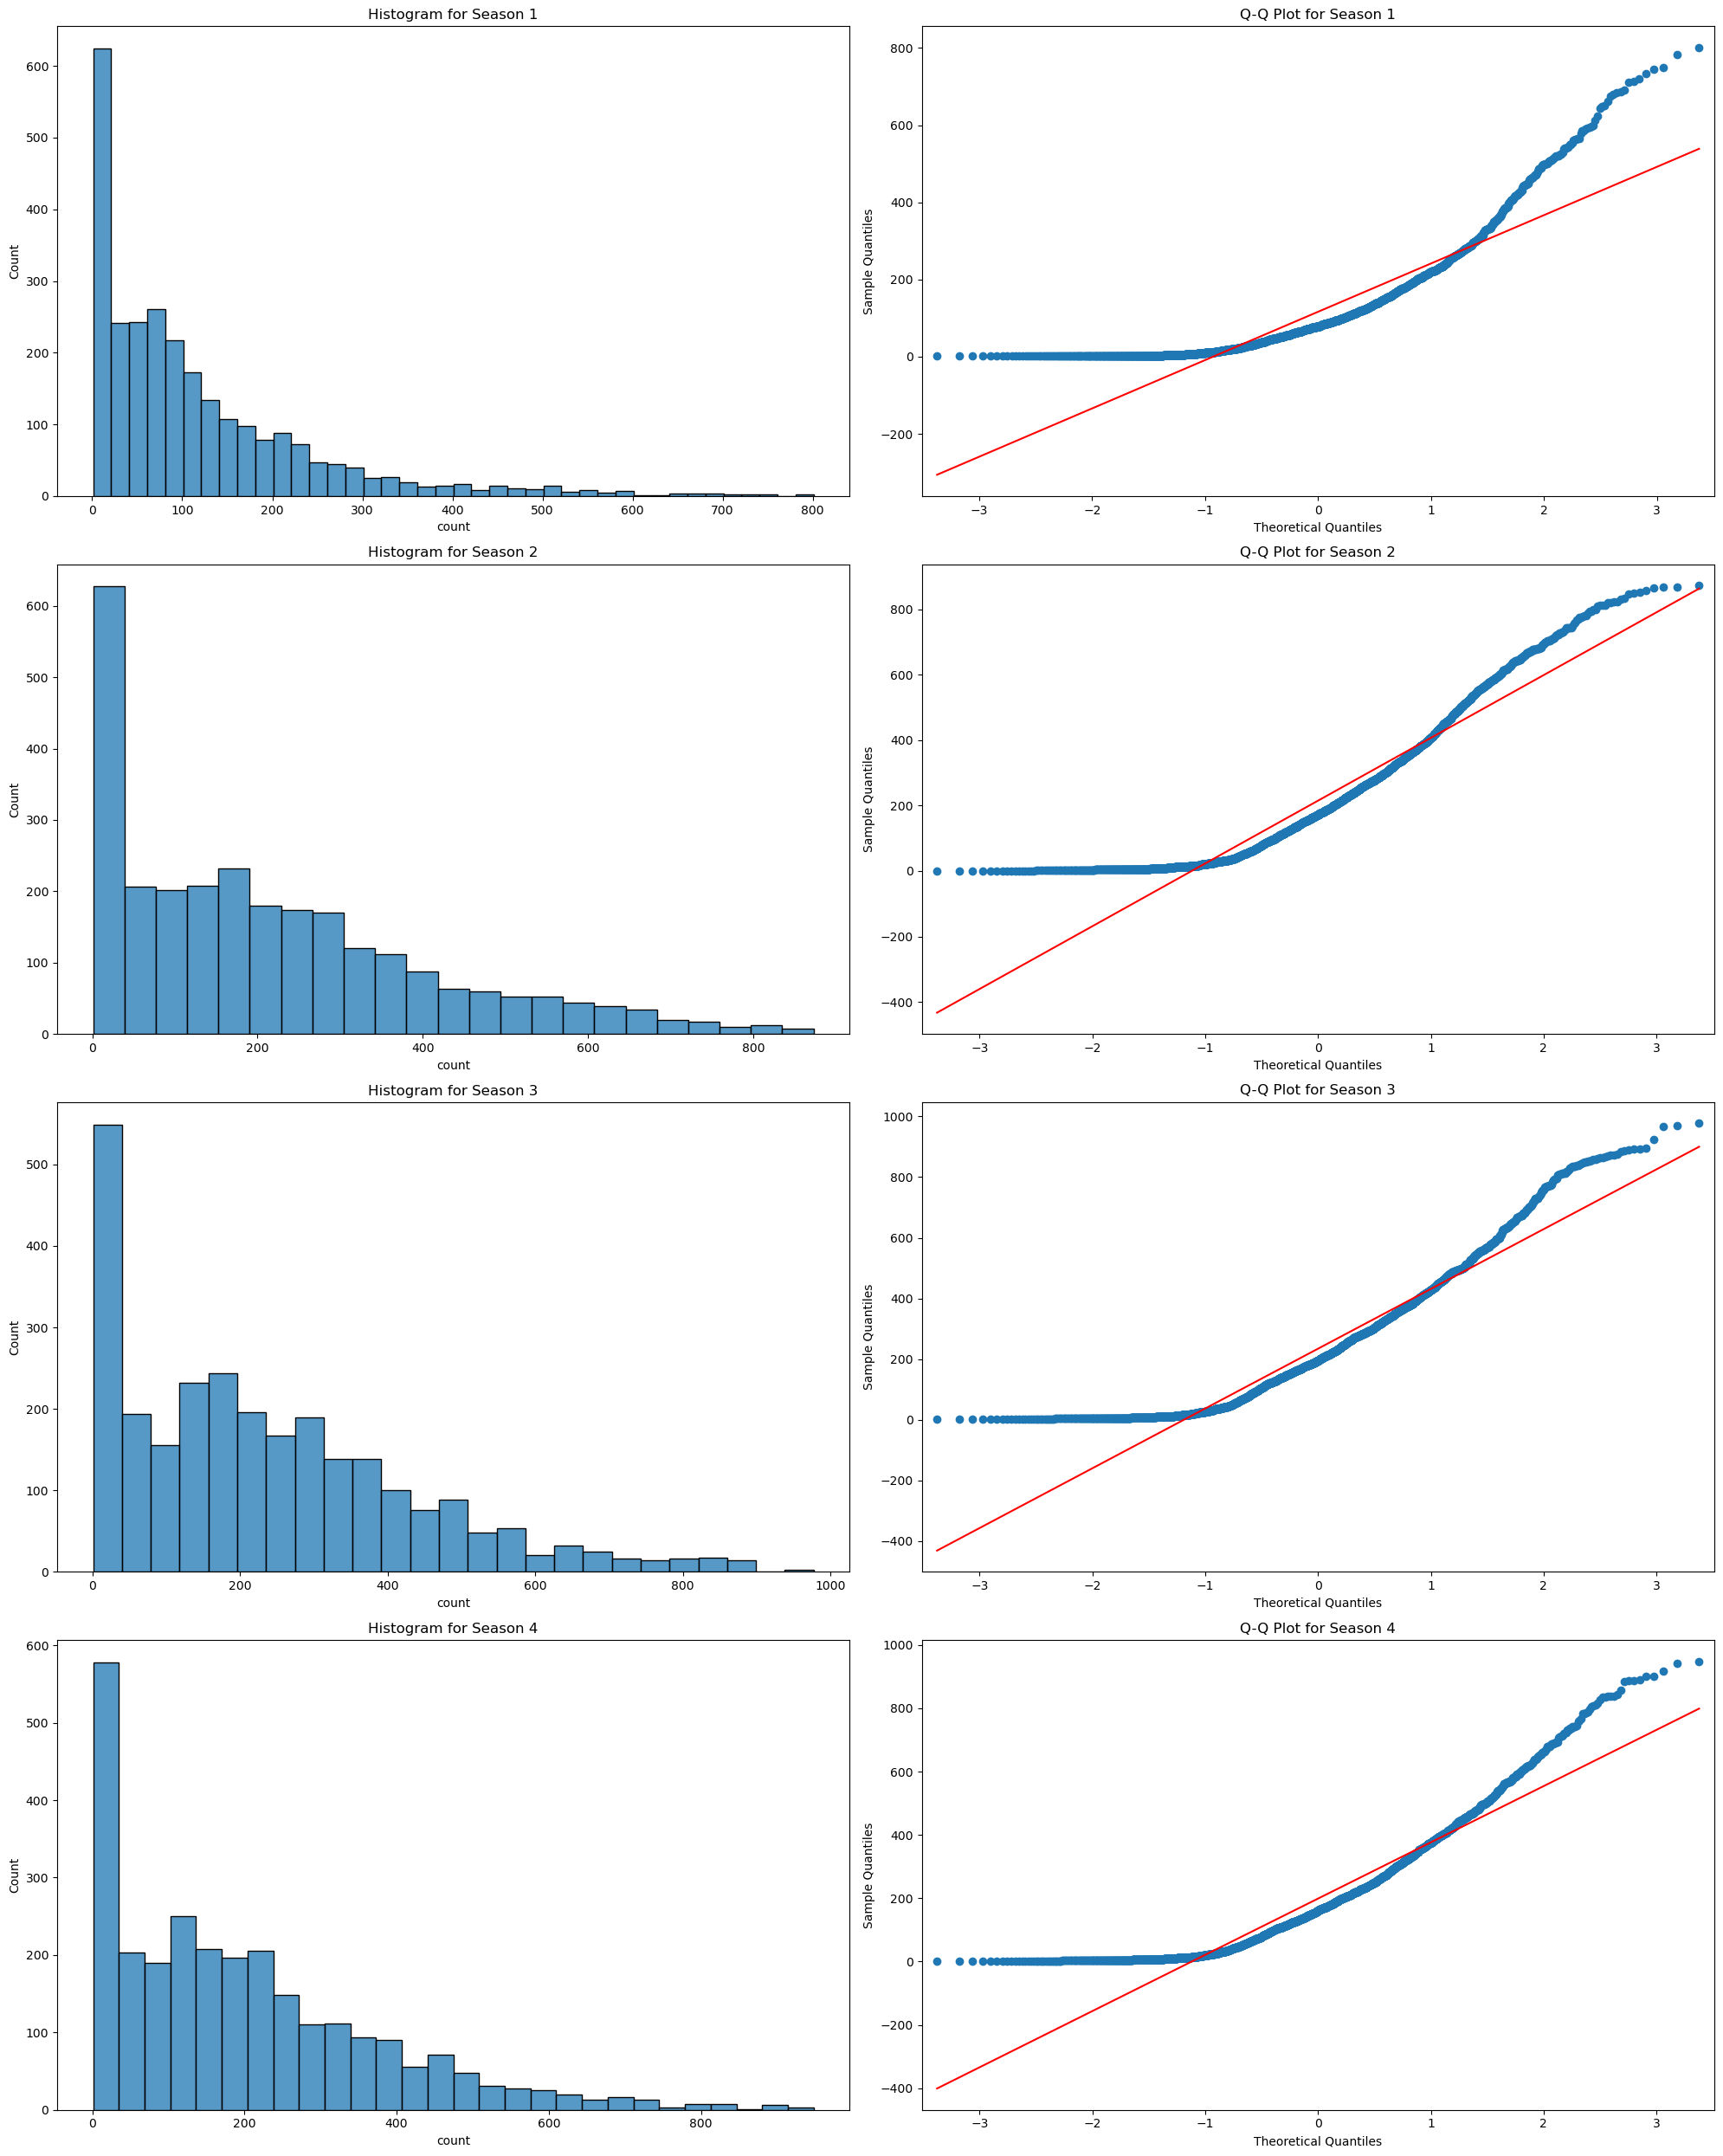

In [27]:
fig, axes = plt.subplots(4, 2, figsize=(20, 25))
#Season 1
sns.histplot(season_1, ax=axes[0, 0])
axes[0, 0].set_title('Histogram for Season 1')
qqplot(season_1, line="s", ax=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot for Season 1')

#Season 2
sns.histplot(season_2, ax=axes[1, 0])
axes[1, 0].set_title('Histogram for Season 2')
qqplot(season_2, line="s", ax=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot for Season 2')

#Season 3
sns.histplot(season_3, ax=axes[2, 0])
axes[2, 0].set_title('Histogram for Season 3')
qqplot(season_3, line="s", ax=axes[2, 1])
axes[2, 1].set_title('Q-Q Plot for Season 3')

#Season 4
sns.histplot(season_4, ax=axes[3, 0])
axes[3, 0].set_title('Histogram for Season 4')
qqplot(season_4, line="s", ax=axes[3, 1])
axes[3, 1].set_title('Q-Q Plot for Season 4')
plt.tight_layout()
plt.show()

##### 1. The QQ plots reveal that the distribution of bike rental counts does not conform to a Gaussian distribution for all seasons.
##### 2. The histograms provide clear evidence that the distribution of bike rental counts is right-skewed for all seasons.
##### ANOVA Assumption 1 - Not Satisfied through Graphically : The data within each category of season does not exhibit a normal distribution.

### Levene Test for Homogeneity of variance in count of bikes rented of all seasons

In [28]:
np.var(season_1),np.var(season_2),np.var(season_3),np.var(season_4)

(15687.725805298045, 36853.52224930644, 38854.29508913101, 31538.180550642683)

In [29]:
H0 = "The variances of the count of bikes rented are equal for all seasons"
Ha = "The variances of the count of bikes rented are NOT equal for all seasons."
p_value = levene(season_1,season_2,season_3,season_4)[1]
print("P-value:",p_value)
if p_value<alpha:
    print("Reject H0.")
    print(Ha)
else:
    print("Fail to Reject H0.")
    print(H0)       

P-value: 1.0147116860043298e-118
Reject H0.
The variances of the count of bikes rented are NOT equal for all seasons.


##### ANOVA Assumption 2 - Not Satisfied : The variances of the count of rented bikes are not consistent across all seasons.

### Kruskal-Wallis Test to Examine the Relationship Between Bike Rental Counts and Seasons

In [30]:
from scipy.stats import kruskal
H0 = "The number of cycles rented is consistent across different seasons."
Ha = "The number of cycles rented varies across different seasons."
p_value = kruskal(season_1,season_2,season_3,season_4)[1]
alpha = 0.05
print("P-value:",p_value)
if p_value<alpha:
    print("Reject H0.")
    print(Ha)
else:
    print("Fail to Reject H0.")
    print(H0)

P-value: 2.479008372608633e-151
Reject H0.
The number of cycles rented varies across different seasons.


##### The number of cycles rented varies across different seasons.

# 4. Weather Vs Count of cycles rented

In [31]:
from scipy.stats import f_oneway,shapiro,levene
Weather_1 = df.loc[df['weather'] == 1]['count']
Weather_2 = df.loc[df['weather'] == 2]['count']
Weather_3 = df.loc[df['weather'] == 3]['count']
Weather_4 = df.loc[df['weather'] == 4]['count']
np.mean(Weather_1),np.mean(Weather_2),np.mean(Weather_3),np.mean(Weather_4)

(205.23679087875416, 178.95553987297106, 118.84633294528521, 164.0)

In [32]:
len(Weather_1),len(Weather_2),len(Weather_3),len(Weather_4)

(7192, 2834, 859, 1)

### To Verify- the count of cycles rented for various weather conditions follows to a Gaussian distribution.

In [33]:
alpha = 0.05
def check_guassian(weather):
    H0 = f"The distribution of the count of cycles rented for {weather} weather follows a Gaussian distribution."
    Ha = f"The distribution of the count of cycles rented for {weather} weather does NOT follow a Gaussian distribution."
    if weather == 1:
        p_value = shapiro(Weather_1)[1]
    elif weather == 2:
        p_value = shapiro(Weather_2)[1]
    elif weather == 3:
        p_value = shapiro(Weather_3)[1]
    else:
        p_value = shapiro(Weather_4)[1]
    print(f"Weather {weather} :")
    print("P-value:",p_value)
    if p_value<alpha:
        print("Reject H0.")
        print(Ha)
    else:
        print("Fail to Reject H0.")
        print(H0)  

In [34]:
check_guassian(1)

Weather 1 :
P-value: 0.0
Reject H0.
The distribution of the count of cycles rented for 1 weather does NOT follow a Gaussian distribution.


/Users/gopalkadam/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [35]:
check_guassian(2)

Weather 2 :
P-value: 9.781063280987223e-43
Reject H0.
The distribution of the count of cycles rented for 2 weather does NOT follow a Gaussian distribution.


In [36]:
check_guassian(3)

Weather 3 :
P-value: 3.876134581802921e-33
Reject H0.
The distribution of the count of cycles rented for 3 weather does NOT follow a Gaussian distribution.


##### ANOVA Assumption 1 - Not Satisfied : The data within each category of weather does not exhibit a normal distribution 

### Assessing Data Distribution of count with Histogram and Q-Q Plot in different weather conditions.

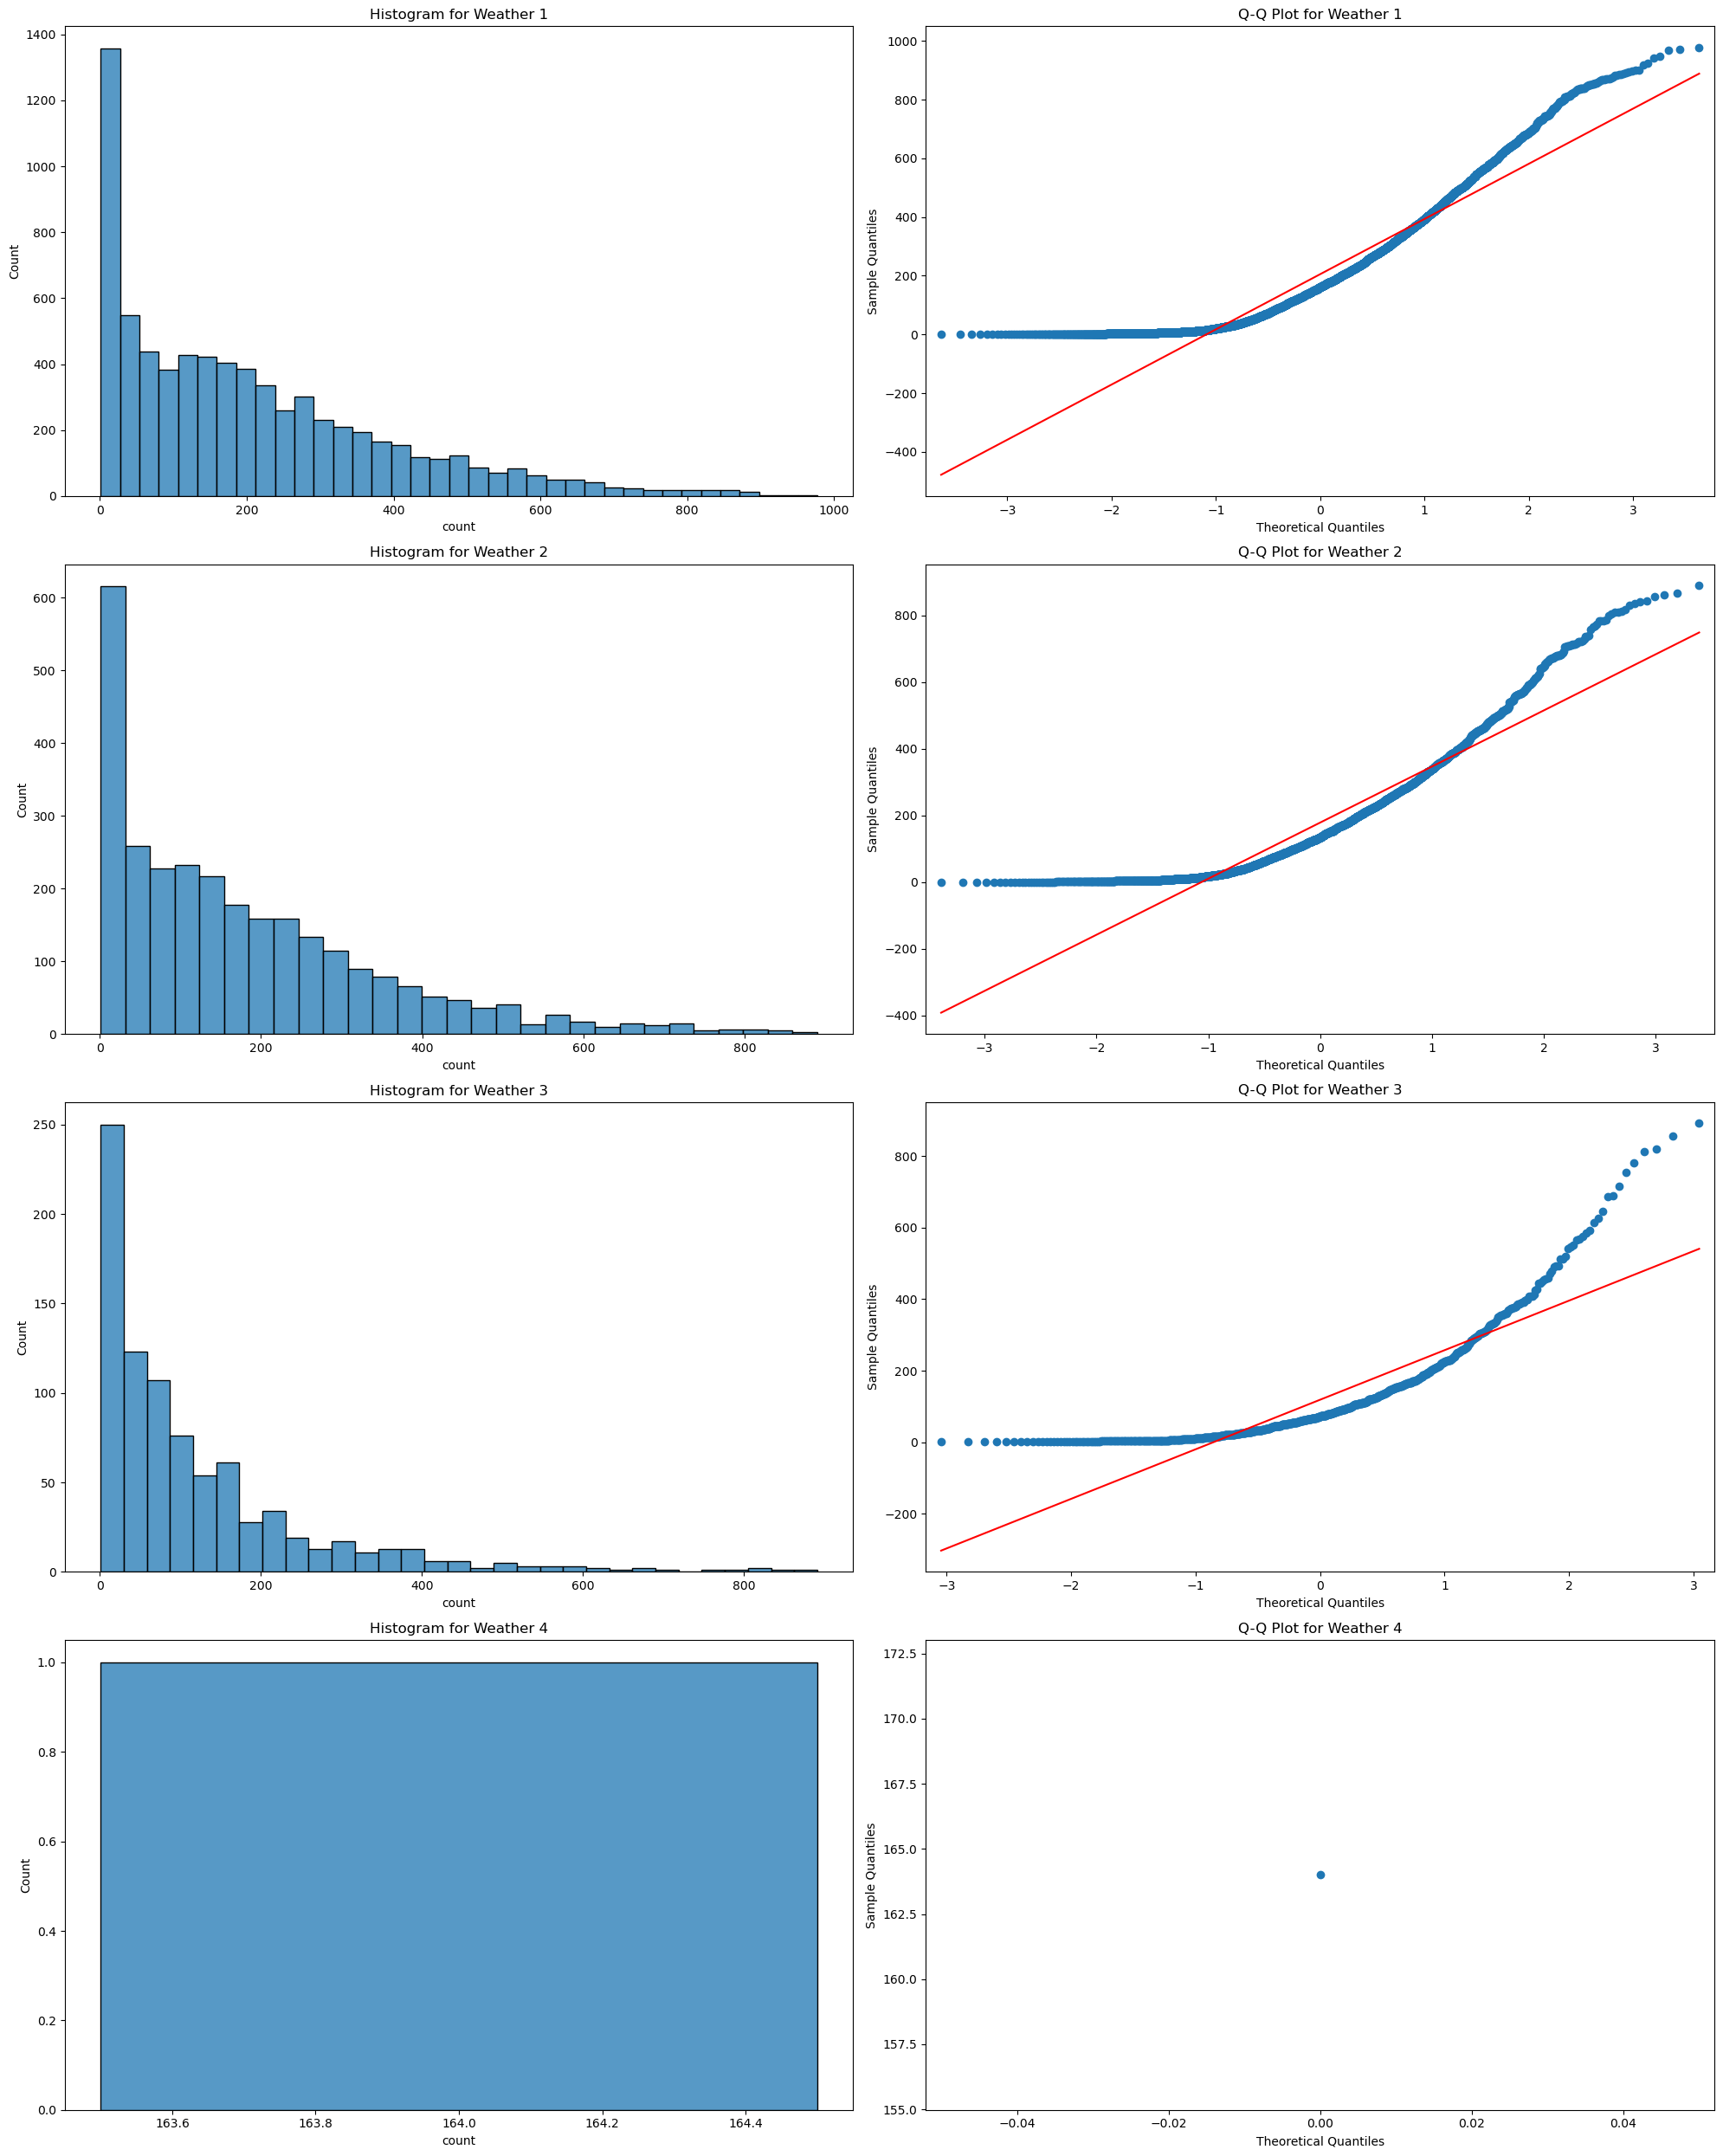

In [37]:
fig, axes = plt.subplots(4, 2, figsize=(20, 25))
#Season 1
sns.histplot(Weather_1, ax=axes[0, 0])
axes[0, 0].set_title('Histogram for Weather 1')
qqplot(Weather_1, line="s", ax=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot for Weather 1')

#Season 2
sns.histplot(Weather_2, ax=axes[1, 0])
axes[1, 0].set_title('Histogram for Weather 2')
qqplot(Weather_2, line="s", ax=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot for Weather 2')

#Season 3
sns.histplot(Weather_3, ax=axes[2, 0])
axes[2, 0].set_title('Histogram for Weather 3')
qqplot(Weather_3, line="s", ax=axes[2, 1])
axes[2, 1].set_title('Q-Q Plot for Weather 3')

#Season 4
sns.histplot(Weather_4, ax=axes[3, 0])
axes[3, 0].set_title('Histogram for Weather 4')
qqplot(Weather_4, line="s", ax=axes[3, 1])
axes[3, 1].set_title('Q-Q Plot for Weather 4')

plt.tight_layout()
plt.show()

##### 1. The QQ plots reveal that the distribution of bike rental counts does not conform to a Gaussian distribution for different weather conditions.
##### 2. The histograms provide clear evidence that the distribution of bike rental counts is right-skewed for different weather conditions..
##### ANOVA Assumption 1 - Not Satisfied through Graphically : The data within each category of weather does not exhibit a normal distribution.

### Levene Test for Homogeneity of variance in count of bikes rented in different weather conditions.

In [38]:
np.var(Weather_1),np.var(Weather_2),np.var(Weather_3),np.var(Weather_4)

(35323.886227076364, 28337.24643543543, 19182.418761290795, 0.0)

In [39]:
H0 = "The variances of the count of bikes rented are equal in different weather conditions."
Ha = "The variances of the count of bikes rented are NOT equal in different weather conditions."
p_value = levene(Weather_1,Weather_2,Weather_3,Weather_4)[1]
print("P-value:",p_value)
if p_value<alpha:
    print("Reject H0.")
    print(Ha)
else:
    print("Fail to Reject H0.")
    print(H0) 

P-value: 3.504937946833238e-35
Reject H0.
The variances of the count of bikes rented are NOT equal in different weather conditions.


##### The variances of the count of bikes rented are NOT equal in different weather conditions.

### Kruskal-Wallis Test to Examine the Relationship Between Bike Rental Counts and Weather

In [40]:
from scipy.stats import kruskal
H0 = "The number of cycles rented is consistent across different weather conditions."
Ha = "The number of cycles rented varies across different weather conditions."
p_value = kruskal(Weather_1,Weather_2,Weather_3,Weather_4)[1]
alpha = 0.05
print("P-value:",p_value)
if p_value<alpha:
    print("Reject H0.")
    print(Ha)
else:
    print("Fail to Reject H0.")
    print(H0)

P-value: 3.501611300708679e-44
Reject H0.
The number of cycles rented varies across different weather conditions.


##### The number of cycles rented varies across different weather conditions.

# 5. Weather Vs Season

In [41]:
from scipy.stats import chi2_contingency
H0 = "There is NO relationship between Weather and Season."
Ha = "There is a significant relationship between Weather and Season."
table = pd.crosstab(index=df['weather'],columns=df['season']).values
p_value = chi2_contingency(observed=table)[1]
print("P-Value:",p_value)
alpha = 0.05
if p_value<alpha:
    print("Reject H0.")
    print(Ha)
else:
    print("Fail to Reject H0.")
    print(H0)

P-Value: 1.5499250736864862e-07
Reject H0.
There is a significant relationship between Weather and Season.


##### There is a significant relationship between Weather and Season.

# 6. Correlation of count with different features

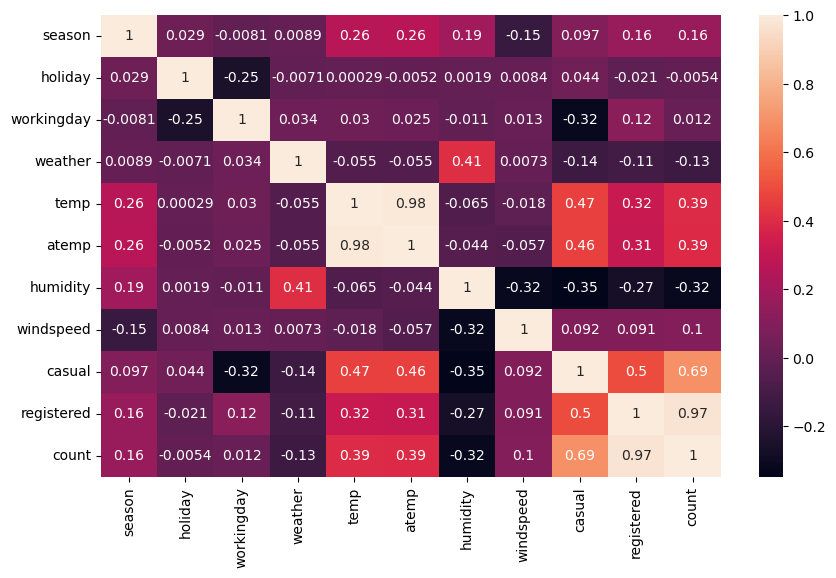

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

##### The features 'season,' 'temp,' 'atemp,' and 'windspeed' exhibit weak positive correlations with the number of cycles rented. Conversely, 'weather' and 'humidity' are weakly negatively correlated with the count of rented cycles. Notably, 'casual' and 'registered' show strong positive correlations with the number of cycles rented.

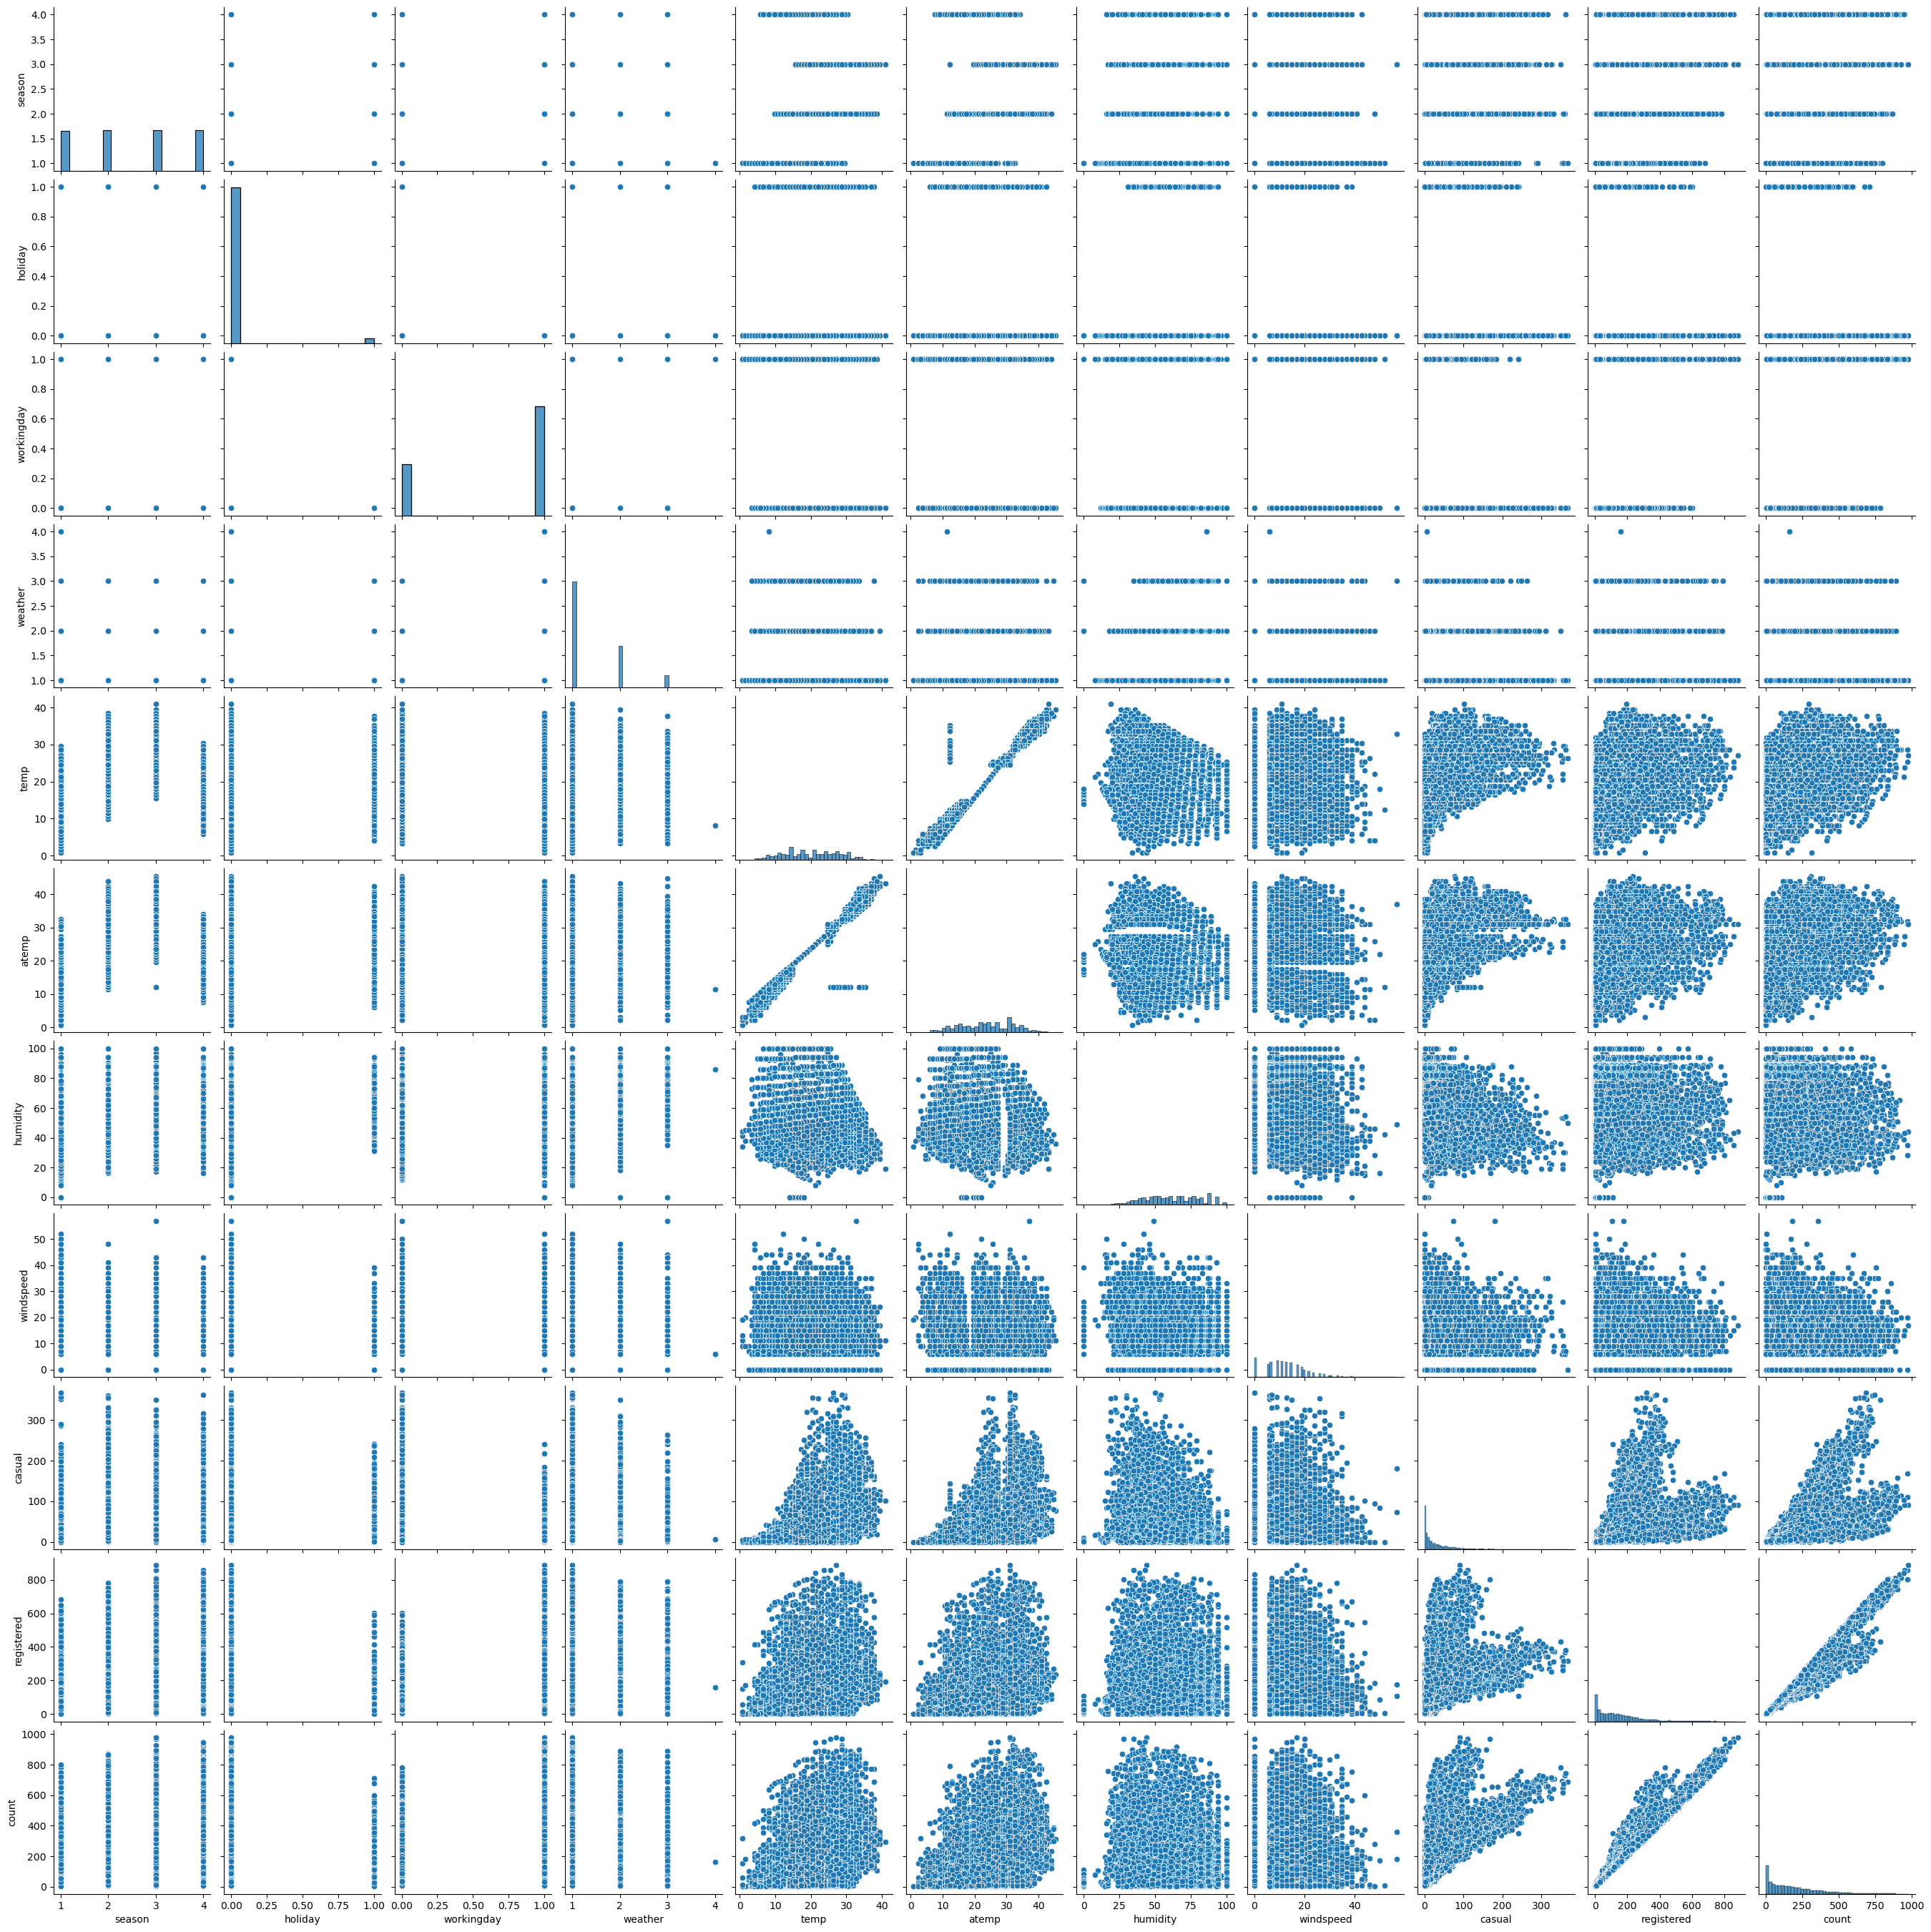

In [43]:
sns.pairplot(df)
plt.show()

## Insights :
##### 0. There is no misssing data 
##### 1. Temperature values range from 0.82 to 41.00, indicating a wide variation in temperature measurements.
##### 2. Feeling temperature values range from 0.76 to 45.45, indicating a wide variation in temperature measurements.
##### 3. Humidity values range from 0.00% (completely dry) to 100.00% (maximum humidity), covering the full spectrum of humidity levels.
##### 4. Windspeed values range from 0.00 (calm or no wind) to 56.9969, encompassing a wide range of wind speeds.
##### 5. The dataset appears to have a relatively balanced distribution of records across the four seasons.
##### 6. The dataset has an imbalanced distribution between non-holiday and holiday records.
##### 7. The dataset has a somewhat imbalanced distribution of records between working days and non-working days.
##### 8. Most Common Weather is of type 1 while rarest one is type 4,The distribution is imbalanced, with a significant difference in counts between the weather types.
##### 9. In each scenario, the presence of outliers indicates instances of exceptionally high or low rental counts that appear to be influenced by specific factors related to weather, holidays, working days, or seasons.
###### 10. Different weather conditions exhibit significant variations in both the mean and median bike rental counts, emphasizing the notable impact of weather on rental demand.
##### 11. Seasons exhibit considerable variations in both the average and median bike rental counts, emphasizing the distinct seasonal impact on rental demand.
##### 12. For 'workingday' and 'holiday' features, there is minimal difference between mean and median bike rental counts, indicating their limited impact on rental patterns.
##### 13. Working day does not have a statistically significant effect on the number of electric cycles rented.
##### 14. Holiday does not have a statistically significant effect on the number of electric cycles rented.
##### 15. The number of cycles rented varies across different seasons.
##### 16. The number of cycles rented varies across different weather conditions.
##### 17. There is a significant relationship between Weather and Season.
##### 18. The features 'season,' 'temp,' 'atemp,' and 'windspeed' exhibit weak positive correlations with the number of cycles rented. Conversely, 'weather' and 'humidity' are weakly negatively correlated with the count of rented cycles. Notably, 'casual' and 'registered' show strong positive correlations with the number of cycles rented.

## Recommandations :
##### 1. Temperature and Weather Influence: It's clear that temperature and weather conditions significantly affect bike rental patterns. Warmer temperatures and favorable weather conditions tend to lead to higher rental counts. Consider promoting bike rentals during periods of ideal weather, and adjust inventory and marketing strategies based on temperature trends.
##### 2. Seasonal Promotions: Leverage the insights on seasonal variations. Offer targeted promotions and marketing campaigns during peak seasons.
###### 3. Holiday Strategy: Although holidays have limited impact on rental patterns, use this knowledge Consider offering holiday-specific promotions to attract riders during those times.
##### 4. Weather-Related Services: Develop weather-specific services or incentives. For example, consider discounts on rainy days to encourage usage during less ideal conditions.
##### 5. Sustainability Initiatives: Promote bike rentals as an eco-friendly and sustainable mode of transportation. Highlight the environmental benefits to attract environmentally conscious riders.